In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data/dataset.csv")
df.head()

vehicle_density  avg_vehicle_speed  speed_std  lane_occupancy  \
0        23.865083          56.660004   5.737366        0.448821   
1        15.755624          67.562554   3.761696        0.203759   
2        14.719641          60.782993   3.558324        0.259485   
3        14.719814          72.431960   0.560680        0.210146   
4        43.372854          33.125925  12.071894        0.685767   

   queue_length  edge_density  optical_flow_mag  shadow_fraction  \
0     13.583201      0.412864          0.395673         0.127440   
1      9.119581      0.343221          0.877234         0.197382   
2      6.966499      0.336209          0.455082         0.196271   
3      4.188474      0.277365          0.730398         0.090561   
4      9.363837      0.643574          0.210252         0.140736   

   time_of_day_norm  road_width_norm  label  
0          0.334763         0.990240      1  
1          0.688851         0.663392      0  
2          0.279968         0.905470      0  
3          0.643183         0.891052      0  
4          0.957246         0.944823      1

In [4]:
df.describe()

vehicle_density  avg_vehicle_speed    speed_std  lane_occupancy  \
count      4000.000000        4000.000000  4000.000000     4000.000000   
mean         20.116392          55.895658     6.351934        0.335010   
std          12.604460          16.584939     4.384556        0.209370   
min           0.326223           5.000000     0.002577        0.000000   
25%          10.933062          46.412276     2.939375        0.181017   
50%          17.535134          57.994579     5.780743        0.297576   
75%          26.604050          67.643562     8.810003        0.453174   
max         116.858197          90.000000    37.937951        1.000000   

       queue_length  edge_density  optical_flow_mag  shadow_fraction  \
count   4000.000000   4000.000000       4000.000000      4000.000000   
mean       7.959204      0.401409          0.560445         0.150426   
std        5.666685      0.135858          0.182694         0.078367   
min        0.109818      0.124681          0.000000         0.000000   
25%        3.922624      0.303003          0.453835         0.094160   
50%        6.521932      0.378663          0.576044         0.148212   
75%       10.463889      0.475957          0.691486         0.202875   
max       43.285818      1.000000          1.000000         0.493909   

       time_of_day_norm  road_width_norm        label  
count       4000.000000      4000.000000  4000.000000  
mean           0.497673         0.699993     0.450000  
std            0.289784         0.172762     0.497556  
min            0.000094         0.400063     0.000000  
25%            0.241122         0.549426     0.000000  
50%            0.495915         0.701816     0.000000  
75%            0.752959         0.845197     1.000000  
max            0.999957         0.999905     1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vehicle_density    4000 non-null   float64
 1   avg_vehicle_speed  4000 non-null   float64
 2   speed_std          4000 non-null   float64
 3   lane_occupancy     4000 non-null   float64
 4   queue_length       4000 non-null   float64
 5   edge_density       4000 non-null   float64
 6   optical_flow_mag   4000 non-null   float64
 7   shadow_fraction    4000 non-null   float64
 8   time_of_day_norm   4000 non-null   float64
 9   road_width_norm    4000 non-null   float64
 10  label              4000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 343.9 KB


In [6]:
print(f"Number of 1 Label : {df['label'].sum()}")
print(f"Number of 0 Label : {df.shape[0]-df['label'].sum()}")

Number of 1 Label : 1800
Number of 0 Label : 2200


<Axes: >

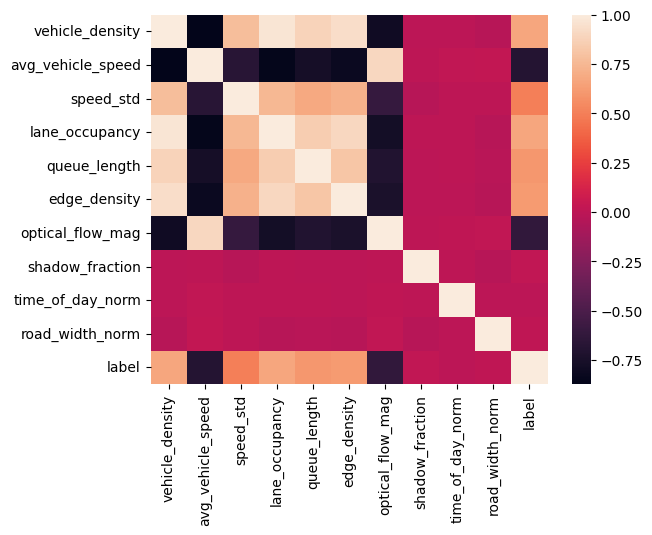

In [7]:
sns.heatmap(df.corr())

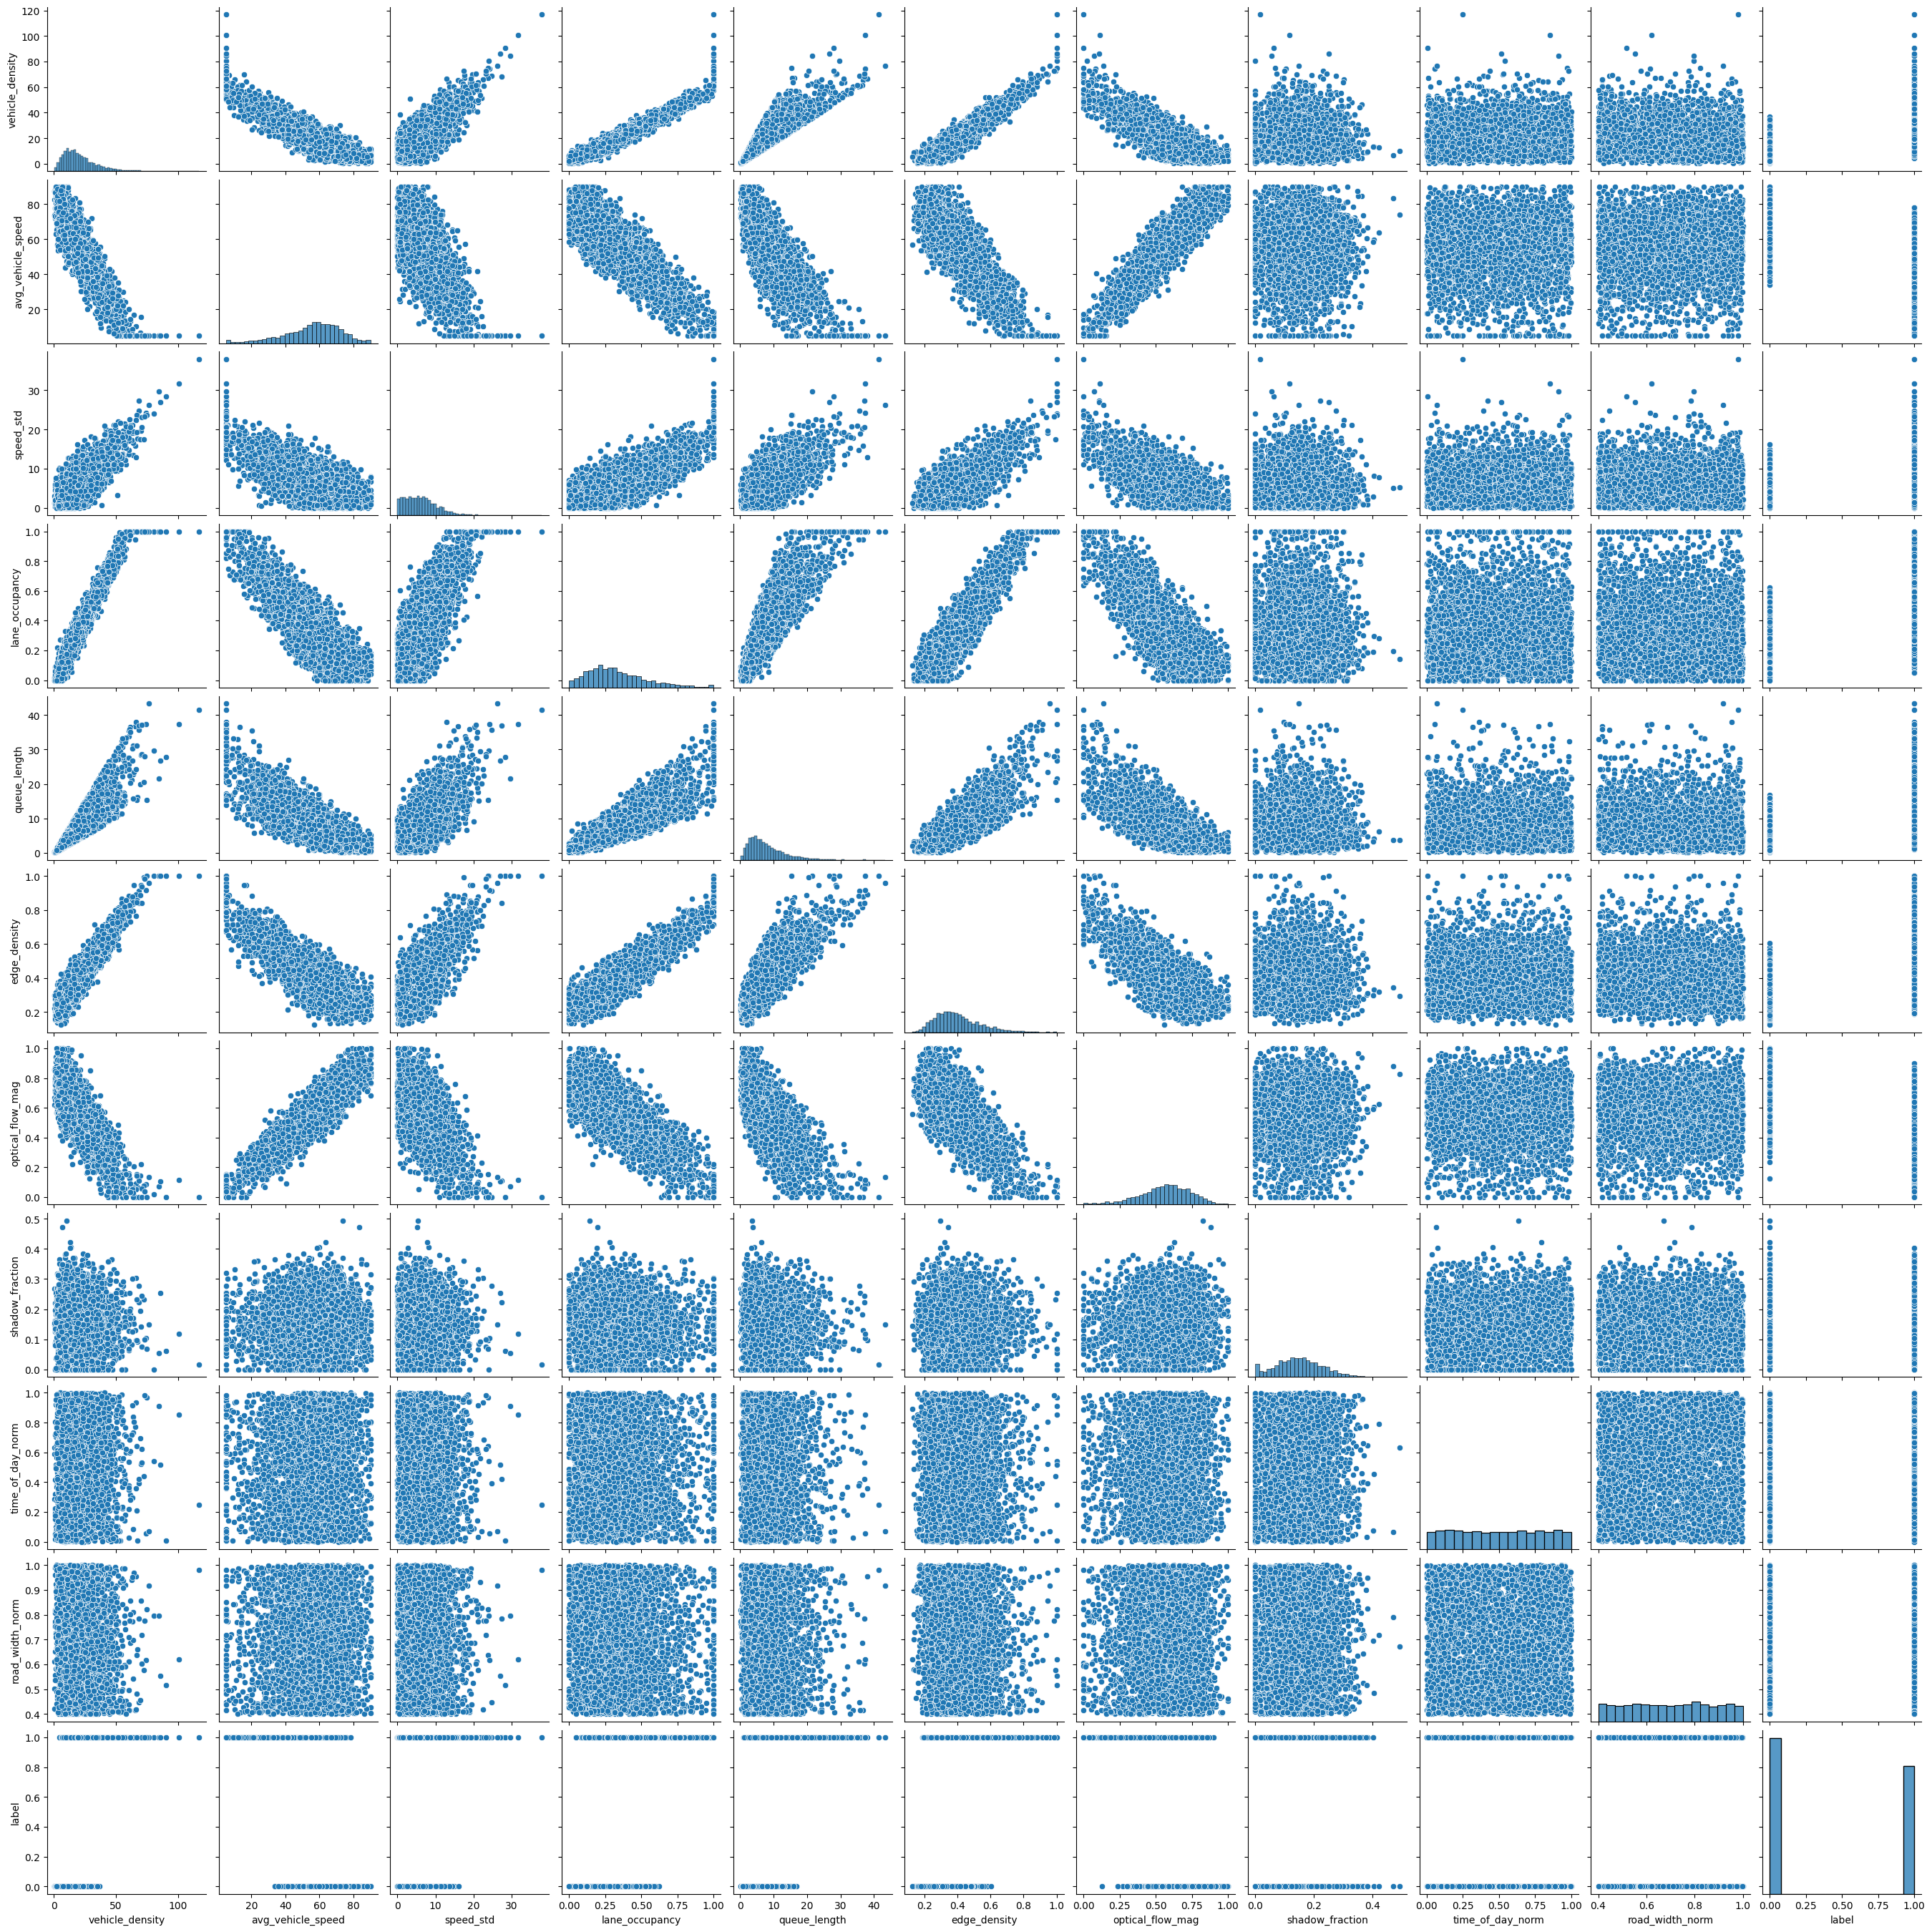

In [8]:
sns.pairplot(df)

In [9]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [10]:
X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [11]:
xgb_model = XGBClassifier(
    eval_metric='logloss',
    objective='binary:logistic',
    random_state=42,
    n_jobs=-1,
    subsample=0.8,
    colsample_bytree=0.8
)
model = GridSearchCV(estimator=xgb_model, 
                     scoring='recall',
										 param_grid={'n_estimators': [200, 300, 400], 
																 'max_depth': [4,5,6], 
																 'learning_rate': [0.02, 0.03, 0.04, 0.05]
										 }, 
                     cv=3,
										 n_jobs=-1, 
										 verbose=2,
        )

In [12]:
model.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ..learning_rate=0.02, max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.02, max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.02, max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.02, max_depth=4, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.02, max_depth=4, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.02, max_depth=4, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.02, max_depth=5, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.02, max_depth=4, n_estimators=400; total time=   0.5s
[CV] END ..learning_rate=0.02, max_depth=4, n_estimators=400; total time=   0.5s
[CV] END ..learning_rate=0.02, max_depth=4, n_estimators=400; total time=   0.5s
[CV] END ..learning_rate=0.02, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.02, max_depth=5, n_e

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.02, 0.03, 0.04, 0.05],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [200, 300, 400]},
             scoring='recall', verbose=2)

In [13]:
model = model.best_estimator_
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [14]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [15]:
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       550
           1       0.82      0.81      0.81       450

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

ROC-AUC: 0.9229252525252526
Confusion Matrix:
 [[468  82]
 [ 87 363]]


In [16]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

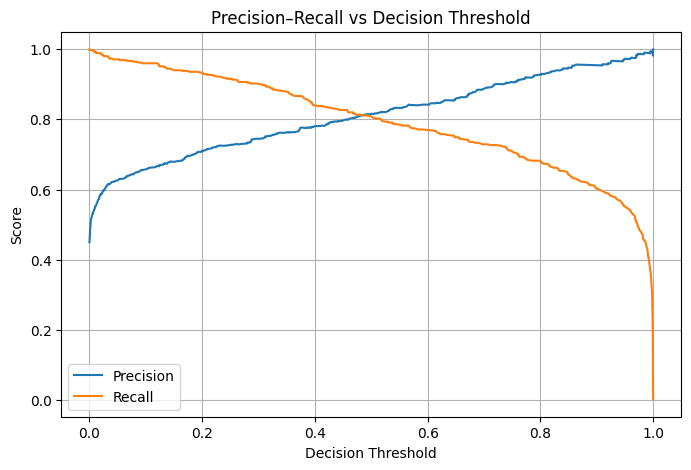

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision–Recall vs Decision Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
threshold = 0.25
y_pred_custom = (y_prob >= threshold).astype(int)

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[396 154]
 [ 38 412]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       550
           1       0.73      0.92      0.81       450

    accuracy                           0.81      1000
   macro avg       0.82      0.82      0.81      1000
weighted avg       0.83      0.81      0.81      1000



In [19]:
risk_band = np.where(
    y_prob >= 0.5, "HIGH",
    np.where(y_prob >= 0.25, "MEDIUM", "LOW")
)
risk_band

array(['LOW', 'LOW', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'LOW',
       'LOW', 'LOW', 'HIGH', 'MEDIUM', 'LOW', 'LOW', 'LOW', 'HIGH',
       'MEDIUM', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'MEDIUM', 'HIGH', 'HIGH',
       'LOW', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'LOW', 'LOW', 'LOW', 'LOW',
       'LOW', 'LOW', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'LOW', 'LOW', 'LOW',
       'LOW', 'HIGH', 'LOW', 'MEDIUM', 'HIGH', 'LOW', 'LOW', 'LOW', 'LOW',
       'HIGH', 'LOW', 'HIGH', 'LOW', 'MEDIUM', 'LOW', 'LOW', 'HIGH',
       'MEDIUM', 'HIGH', 'LOW', 'LOW', 'MEDIUM', 'HIGH', 'HIGH', 'HIGH',
       'LOW', 'LOW', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'HIGH', 'LOW',
       'HIGH', 'LOW', 'LOW', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'HIGH', 'LOW',
       'HIGH', 'HIGH', 'HIGH', 'MEDIUM', 'HIGH', 'HIGH', 'HIGH', 'LOW',
       'LOW', 'HIGH', 'LOW', 'HIGH', 'LOW', 'LOW', 'MEDIUM', 'LOW', 'LOW',
       'MEDIUM', 'HIGH', 'LOW', 'MEDIUM', 'LOW', 'LOW', 'LOW', 'LOW',
       'LOW', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'HIGH', '

In [20]:
model.save_model("traffic_model.json")
import json

metadata = {
    "threshold": 0.25,
    "features": list(X.columns),
    "risk_bands": {
        "low": "< 0.25",
        "medium": "0.25–0.5",
        "high": ">= 0.5"
    }
}

with open("traffic_model_metadata.json", "w") as f:
    json.dump(metadata, f, indent=4)


In [24]:
df_vis = X_test.copy()
df_vis["risk_score"] = y_prob
df_vis = df_vis.reset_index(drop=True)

grid_width = 25
df_vis["grid_x"] = df_vis.index % grid_width
df_vis["grid_y"] = df_vis.index // grid_width


In [25]:
df_vis.head()

vehicle_density  avg_vehicle_speed  speed_std  lane_occupancy  \
0        11.025518          62.734819   3.550401        0.152853   
1        22.141148          64.753408   1.443303        0.453135   
2        33.685694          36.739552  11.545193        0.554257   
3        44.149373          25.989516  15.377914        0.687494   
4        26.933508          50.121780   5.522915        0.386231   

   queue_length  edge_density  optical_flow_mag  shadow_fraction  \
0      6.379146      0.389979          0.626613         0.010776   
1      6.766278      0.489916          0.713856         0.202213   
2     17.995035      0.539666          0.348418         0.132803   
3     15.658859      0.628014          0.157591         0.109541   
4     10.463327      0.495696          0.491365         0.073684   

   time_of_day_norm  road_width_norm  risk_score  grid_x  grid_y  
0          0.030141         0.507490    0.229272       0       0  
1          0.645243         0.686532    0.147184       1       0  
2          0.236572         0.961801    0.999518       2       0  
3          0.812900         0.680820    0.999632       3       0  
4          0.552500         0.511619    0.675140       4       0

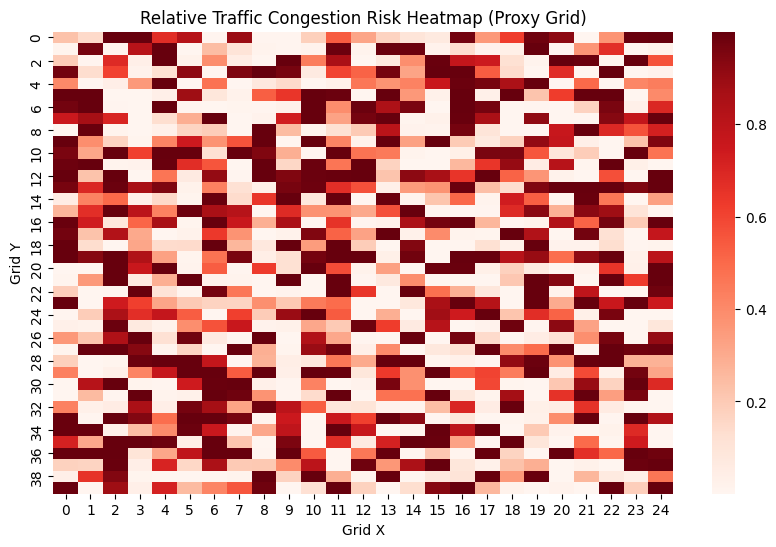

In [28]:
pivot = df_vis.pivot_table(
    values="risk_score",
    index="grid_y",
    columns="grid_x",
    aggfunc="mean"
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="Reds")
plt.title("Relative Traffic Congestion Risk Heatmap (Proxy Grid)")
plt.xlabel("Grid X")
plt.ylabel("Grid Y")
plt.show()


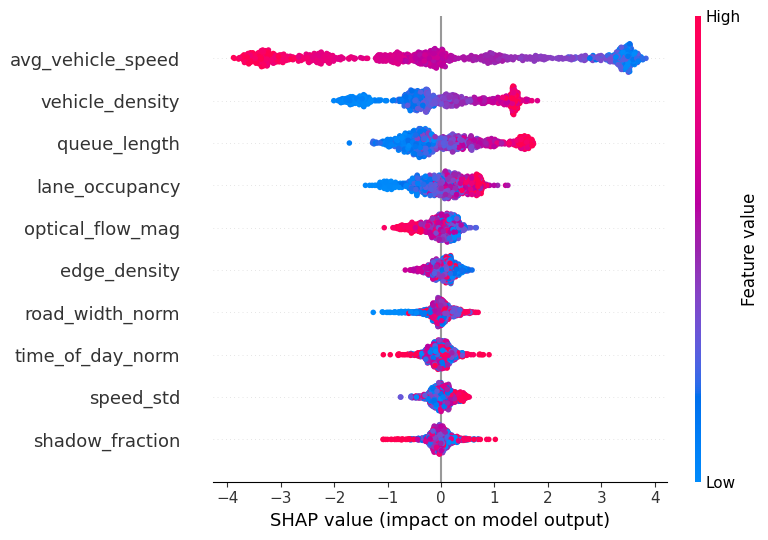

In [33]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [34]:
idx = np.argmax(y_prob)  # most risky instance
shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    X_test.iloc[idx]
)